In [77]:
!conda install pandas==1.5.3

^C


In [78]:
# !pip install QuantStats==0.0.59

In [79]:
import pandas as pd

In [83]:
pd.__version__

'2.0.2'

In [84]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import quantstats as qs

In [85]:
def create_required_dataframe(start_date,end_date):
    # read dataset
    weights = pd.read_csv('weights.csv')
    btc = pd.read_csv('btc_04012013.csv')

    # process dataset
    btc = btc[['time','close']]
    btc = btc.set_index('time')
    btc = btc[(btc.index>=start_date)]

    btc = btc[btc.index<=end_date]
    btc['pct_change'] = (btc['close'] - btc['close'].shift(1))/btc['close'].shift(1)
    btc = btc.fillna(0)

    weights = weights.set_index('time')
    weights = weights[(weights.index>=start_date)]
    weights = weights[weights.index<=end_date]
    weights = weights.shift(1).fillna(0)


    # merge dataset
    btc_ret = pd.merge(btc,weights,how='left',left_on='time',right_on='time')
    btc_ret = btc_ret[['close','pct_change','BTC']]
    btc_ret = btc_ret.dropna()
    btc_ret['ret'] = btc_ret['pct_change']*btc_ret['BTC']
    
    # change column names
    btc_ret.columns = ['close','bnh_return','weight','strat_return']
    
    
    return btc_ret

In [86]:
def create_required_dataframe_binance(start_date,end_date):
    # read dataset
    weights = pd.read_csv('weights.csv')
    btc = pd.read_csv('BTCBUSD_20210601_20220724_1D.csv')
    btc.rename(columns={'dateTime':'time'}, inplace=True)
    btc['time'] = btc['time'].str[:10]

    # process dataset
    btc = btc[['time','close']]
    btc = btc.set_index('time')
    btc = btc[(btc.index>=start_date)]

    btc = btc[btc.index<=end_date]
    btc['pct_change'] = (btc['close'] - btc['close'].shift(1))/btc['close'].shift(1)
    btc = btc.fillna(0)

    weights = weights.set_index('time')
    weights = weights[(weights.index>=start_date)]
    weights = weights[weights.index<=end_date]
    weights = weights.shift(1).fillna(0)


    # merge dataset
    btc_ret = pd.merge(btc,weights,how='left',left_on='time',right_on='time')
    btc_ret = btc_ret[['close','pct_change','BTC']]
    btc_ret = btc_ret.dropna()
    btc_ret['ret'] = btc_ret['pct_change']*btc_ret['BTC']
    
    # change column names
    btc_ret.columns = ['close','bnh_return','weight','strat_return']
    
    
    return btc_ret

In [87]:
# get the required series
start_date,end_date = '2014-01-26','2022-07-24'
btc_ret = create_required_dataframe(start_date,end_date)
stock = btc_ret[['strat_return']]
stock.index = pd.to_datetime(stock.index)

In [88]:
stock.columns = ['return']
stock = stock['return']

In [91]:
stock

time
2014-01-26    0.000000
2014-01-27   -0.000000
2014-01-28    0.000000
2014-01-29    0.000000
2014-01-30    0.000000
                ...   
2022-07-17   -0.007002
2022-07-18    0.029493
2022-07-19    0.077567
2022-07-20    0.002319
2022-07-21   -0.009427
Name: return, Length: 3088, dtype: float64

In [89]:
# get basic metrics
qs.reports.metrics(stock)


                    Strategy
------------------  ----------
Start Period        2014-01-26
End Period          2022-07-21
Risk-Free Rate      0.0%
Time in Market      48.0%

Cumulative Return   8,917.40%
CAGR﹪              69.96%

Sharpe              1.1
Prob. Sharpe Ratio  99.99%
Sortino             1.69
Sortino/√2          1.2
Omega               1.35

Max Drawdown        -64.02%
Longest DD Days     561

Gain/Pain Ratio     0.35
Gain/Pain (1M)      1.85

Payoff Ratio        1.12
Profit Factor       1.35
Common Sense Ratio  1.7
CPC Index           0.83
Tail Ratio          1.26
Outlier Win Ratio   9.69
Outlier Loss Ratio  3.41

MTD                 14.85%
3M                  17.63%
6M                  40.37%
YTD                 40.37%
1Y                  113.83%
3Y (ann.)           89.69%
5Y (ann.)           73.65%
10Y (ann.)          69.96%
All-time (ann.)     69.96%

Avg. Drawdown       -9.95%
Avg. Drawdown Days  45
Recovery Factor     139.3
Ulcer Index         0.28
Serenity Index    

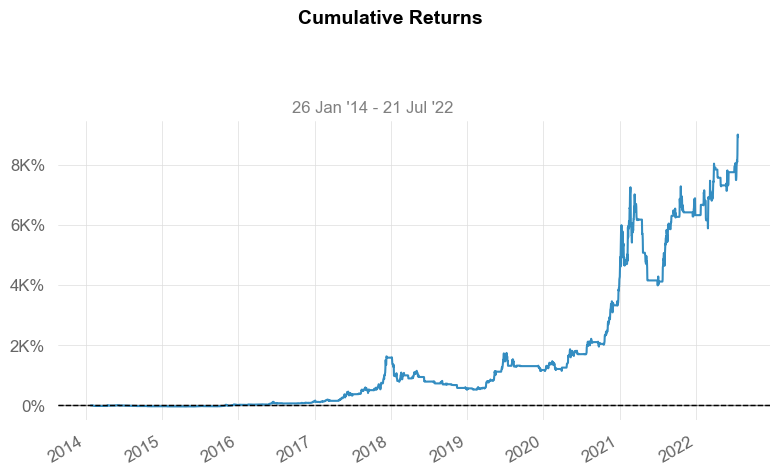

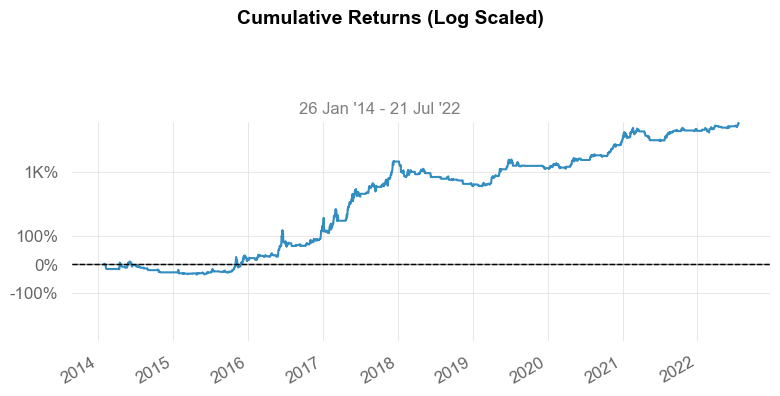

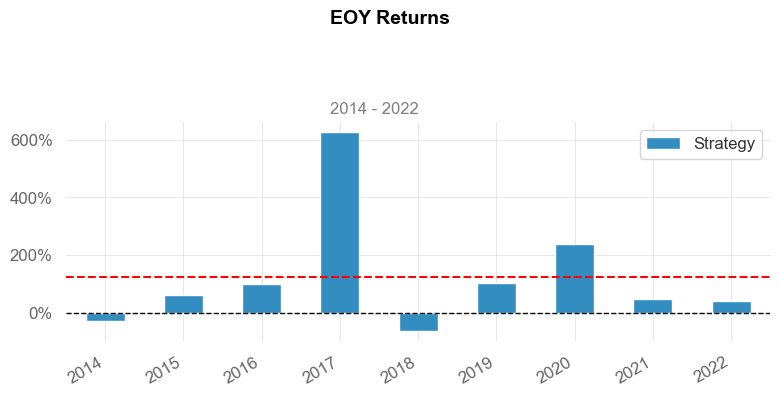

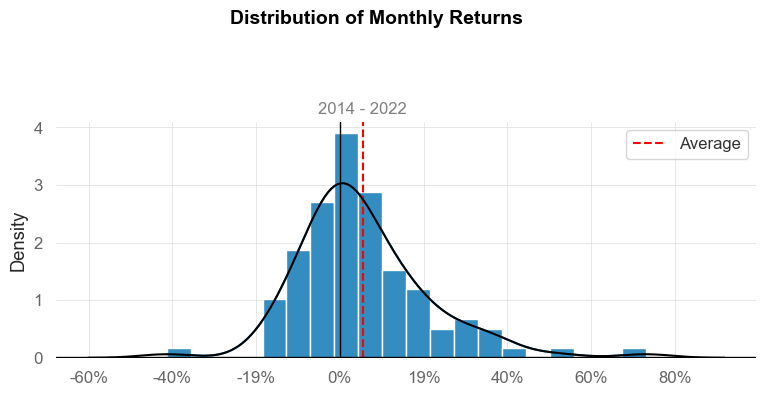

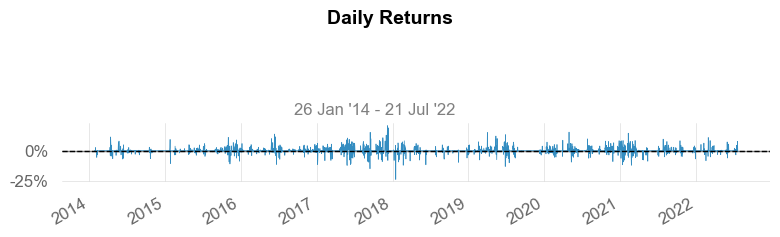

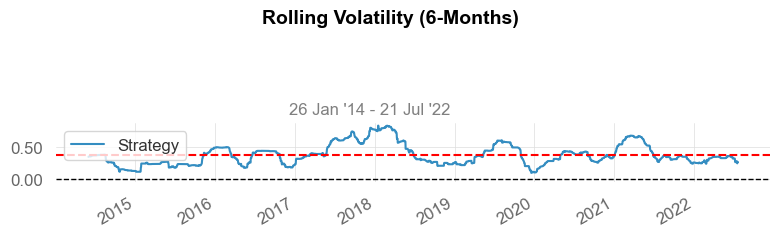

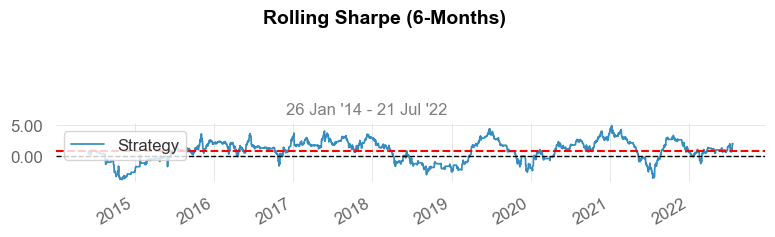

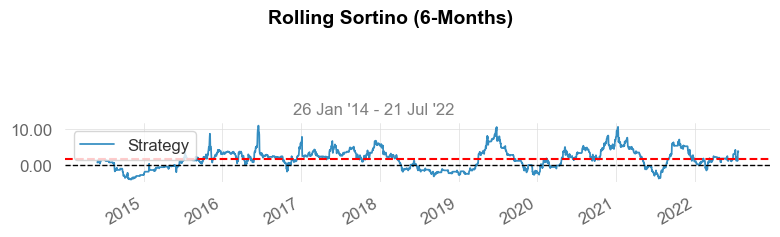

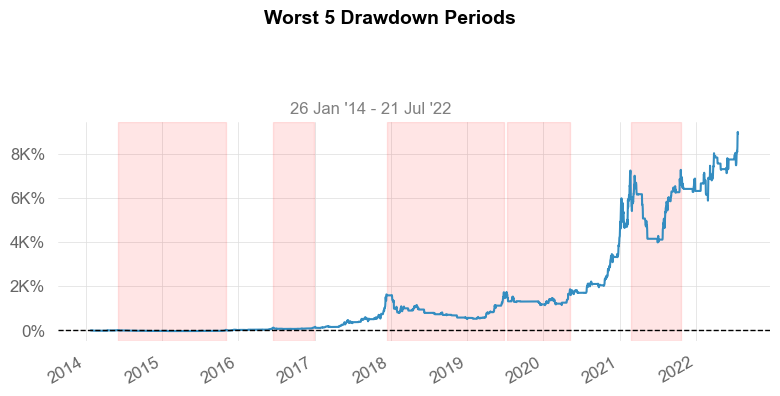

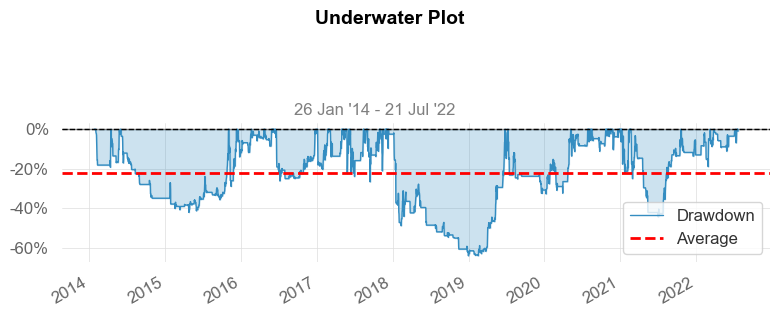

TypeError: pivot() takes 1 positional argument but 4 were given

In [90]:
# get plots
qs.reports.plots(stock,mode='full') 

In [ ]:
# get basic report
qs.reports.basic(stock)

In [ ]:
# get full report
qs.reports.full(stock)

In [ ]:
qs.reports.html(stock,output='report.html')